In [1]:
from QHyper.problems.brain_community_detection import BrainCommunityDetection

k = 4
path = "../QHyper/problems/brain_community_data"
data_name = 'Edge_AAL90_Binary'
brain = BrainCommunityDetection(path, data_name, k)

<class 'networkx.utils.decorators.argmap'> compilation 9:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


In [2]:
from QHyper.solvers.dqm.dqm import DQM


dqm_problem = DQM(problem=brain, time=5)
samples = dqm_problem.solve(None)


In [8]:
import numpy as np


sample = samples.first.sample
energy = samples.first.energy
run_time=(samples.info['run_time'])*0.001

communities=[]
for k in (range(brain.k)):
    comm=[]
    for i in sample:
        if sample[i]==k:
            comm.append(i)
    communities.append(set(comm))

counts = np.zeros(brain.k)
for s in sample.values():
    counts[s] += 1

print(sample)


{0: 2, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 2, 17: 2, 18: 0, 19: 2, 20: 3, 21: 3, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 2, 29: 2, 30: 0, 31: 0, 32: 2, 33: 2, 34: 1, 35: 1, 36: 3, 37: 3, 38: 3, 39: 3, 40: 3, 41: 3, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 2, 57: 2, 58: 1, 59: 1, 60: 0, 61: 0, 62: 2, 63: 2, 64: 0, 65: 0, 66: 1, 67: 1, 68: 2, 69: 2, 70: 3, 71: 3, 72: 3, 73: 3, 74: 3, 75: 3, 76: 3, 77: 3, 78: 2, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 0, 85: 0, 86: 3, 87: 3, 88: 0, 89: 0}


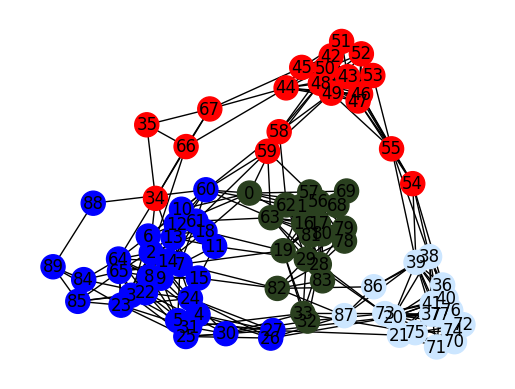

In [4]:
output_folder = path
results = communities, run_time, energy, counts, sample
brain.plot_results(output_folder, results)